**Setup**

In [1]:
%pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu

**Available Demo**

In [2]:
from sdv.datasets.demo import get_available_demos
get_available_demos(modality='single_table')

,dataset_name,size_MB,num_tables
0,KRK_v1,0.06,1
1,adult,3.91,1
2,alarm,4.52,1
3,asia,1.28,1
4,census,98.17,1
5,census_extended,4.95,1
6,child,3.20,1
7,covtype,255.65,1
8,credit,68.35,1
9,expedia_hotel_logs,0.20,1


**Import**

In [3]:
from sdv.datasets.demo import download_demo
real_data,metadata=download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

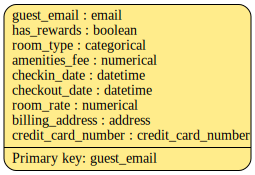

In [4]:
metadata.visualize()

**Checking the real data.**

In [5]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


**Null/Nan Values Look.**

In [6]:
real_data.isnull().sum()

guest_email            0
has_rewards            0
room_type              0
amenities_fee         45
checkin_date           0
checkout_date         20
room_rate              0
billing_address        0
credit_card_number     0
dtype: int64

In [7]:
real_data.dropna(inplace=True)

In [8]:
real_data.isnull().sum()

guest_email           0
has_rewards           0
room_type             0
amenities_fee         0
checkin_date          0
checkout_date         0
room_rate             0
billing_address       0
credit_card_number    0
dtype: int64

In [10]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
5,garciacarol@reid-crawford.biz,True,BASIC,0.00,18 Oct 2020,20 Oct 2020,177.76,"653 Brianna Mill\nBurtonview, TX 66595",4701079720447404938
6,phillipsmatthew@powers-martinez.com,False,BASIC,19.56,22 Nov 2020,24 Nov 2020,108.09,"923 Bonilla Extension Apt. 787\nBrianside, TN ...",6011956907055260


**Generation of syhthetic data.**

In [11]:
from sdv.single_table import GaussianCopulaSynthesizer
synthesizer=GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(


In [13]:
synthetic_data=synthesizer.sample(num_rows=200)
synthetic_data

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,christophervazquez@example.com,True,DELUXE,12.79,16 Mar 2020,30 Mar 2020,119.38,60945 Michelle Shoal Suite 594\nLake Tiffanymo...,3537187319841509
1,ronaldvega@example.net,False,DELUXE,21.24,27 Jun 2020,03 Sep 2020,173.82,20642 Elizabeth Estates Suite 296\nMartinezbur...,376083247245584
2,martinjames@example.org,False,BASIC,25.88,16 Mar 2020,11 Mar 2020,145.15,"217 Dennis Rapids\nAndrewville, AK 27423",4982613005565229369
3,banderson@example.org,False,BASIC,20.81,28 Apr 2020,20 May 2020,193.62,"89336 Simpson Common\nJasontown, AR 51668",3543023281234237
4,roy99@example.net,False,DELUXE,19.15,09 Jan 2020,09 Jan 2020,197.59,"88393 Rodriguez Inlet\nMirandashire, RI 11144",4240846717432429
...,...,...,...,...,...,...,...,...,...
195,kclark@example.net,False,BASIC,15.96,14 Mar 2020,13 Mar 2020,156.26,"584 Stephanie Squares Apt. 876\nFieldsshire, O...",213112013122219
196,natalie63@example.org,False,BASIC,17.02,21 Jul 2020,14 Aug 2020,223.47,"02294 Barbara Throughway Apt. 984\nNancyfurt, ...",6594902048854398
197,laurawall@example.org,False,BASIC,32.15,13 May 2020,02 Jul 2020,196.15,"127 Calderon Stravenue Apt. 424\nPort Abigail,...",30529717535290
198,sandersgloria@example.net,True,BASIC,27.93,05 Jul 2020,04 Jul 2020,125.55,"651 Melissa Terrace\nCaroltown, CT 66611",4900470482621222


In [14]:
synthetic_data.isnull().sum()

guest_email           0
has_rewards           0
room_type             0
amenities_fee         0
checkin_date          0
checkout_date         0
room_rate             0
billing_address       0
credit_card_number    0
dtype: int64

**Running diagnostic.**

In [17]:
from sdv.evaluation.single_table import run_diagnostic
report=run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 188.52it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


**Evaluating Quality.**

In [18]:
from sdv.evaluation.single_table import evaluate_quality
report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 83.79it/s]

Overall Score: 68.75%

Properties:
- Column Shapes: 91.7%
- Column Pair Trends: 45.8%


In [19]:
!pip install table_evaluator

**Visual Evaluation**

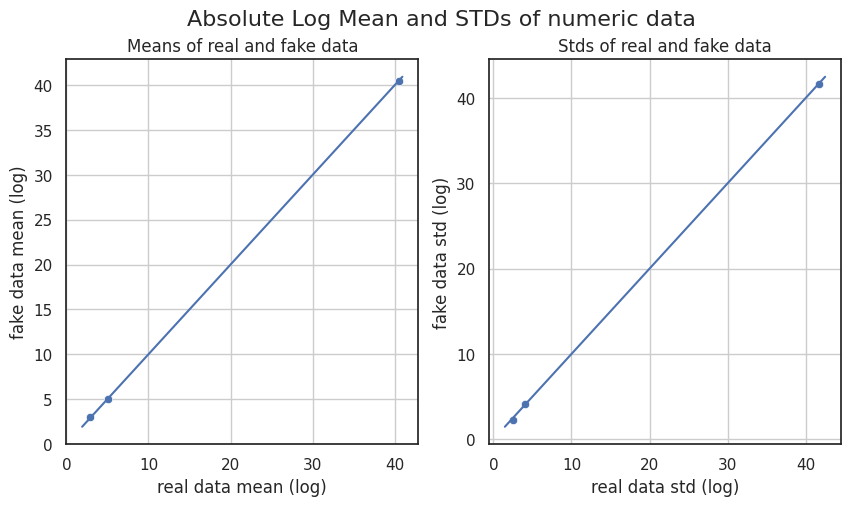

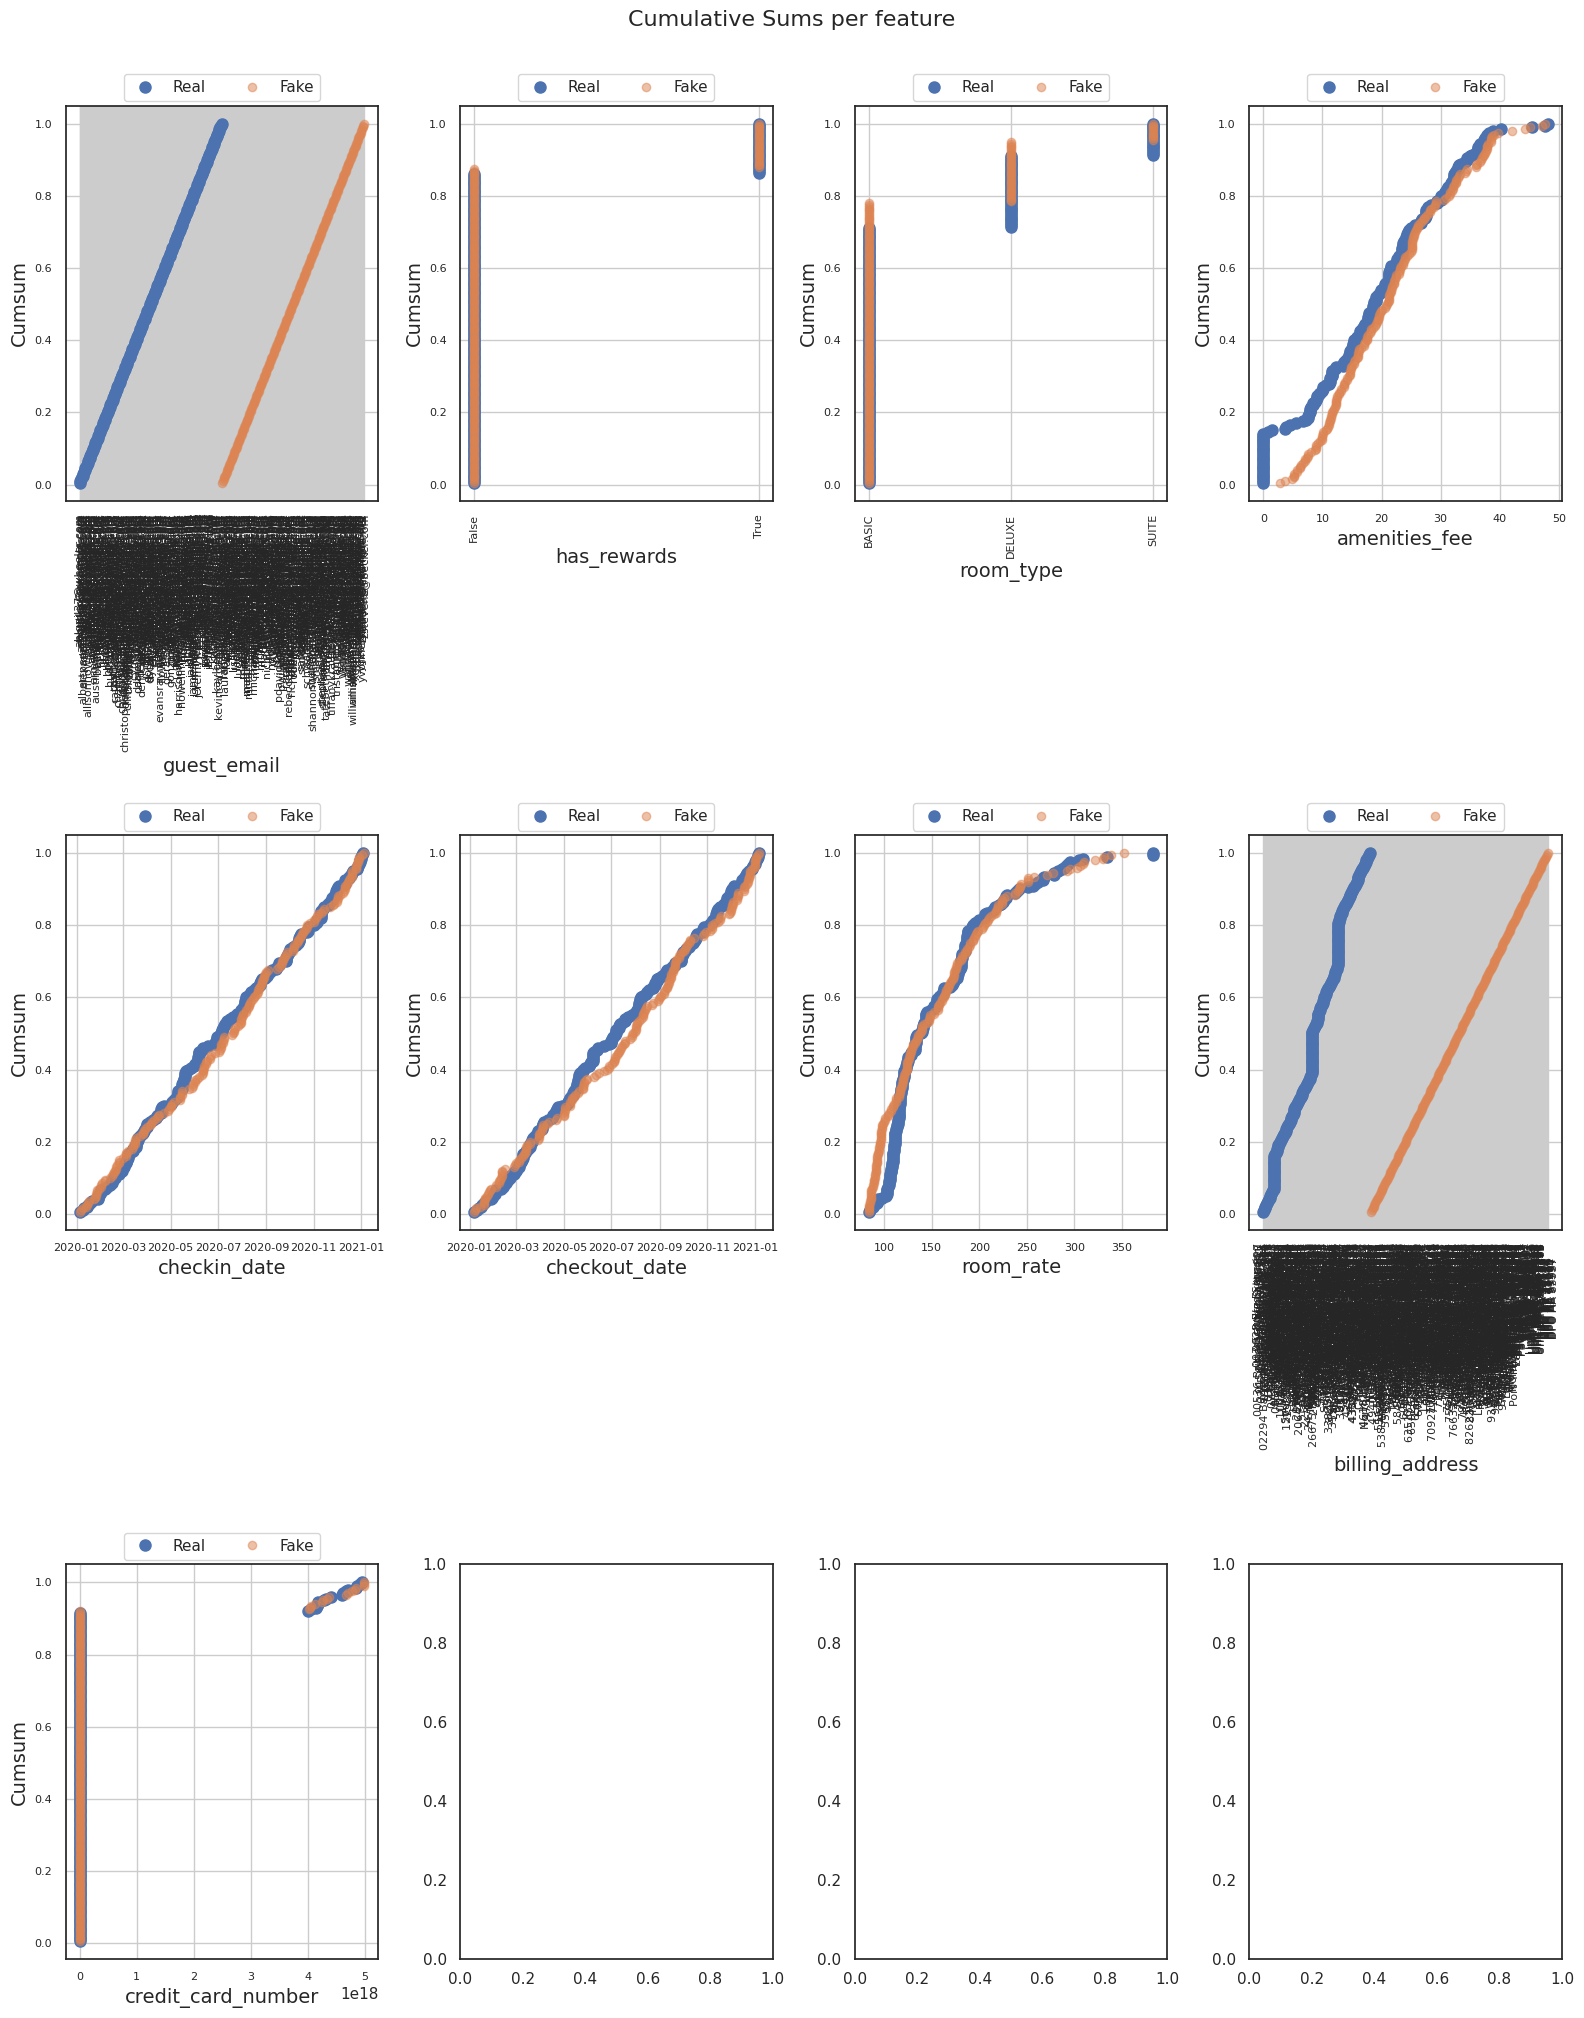

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

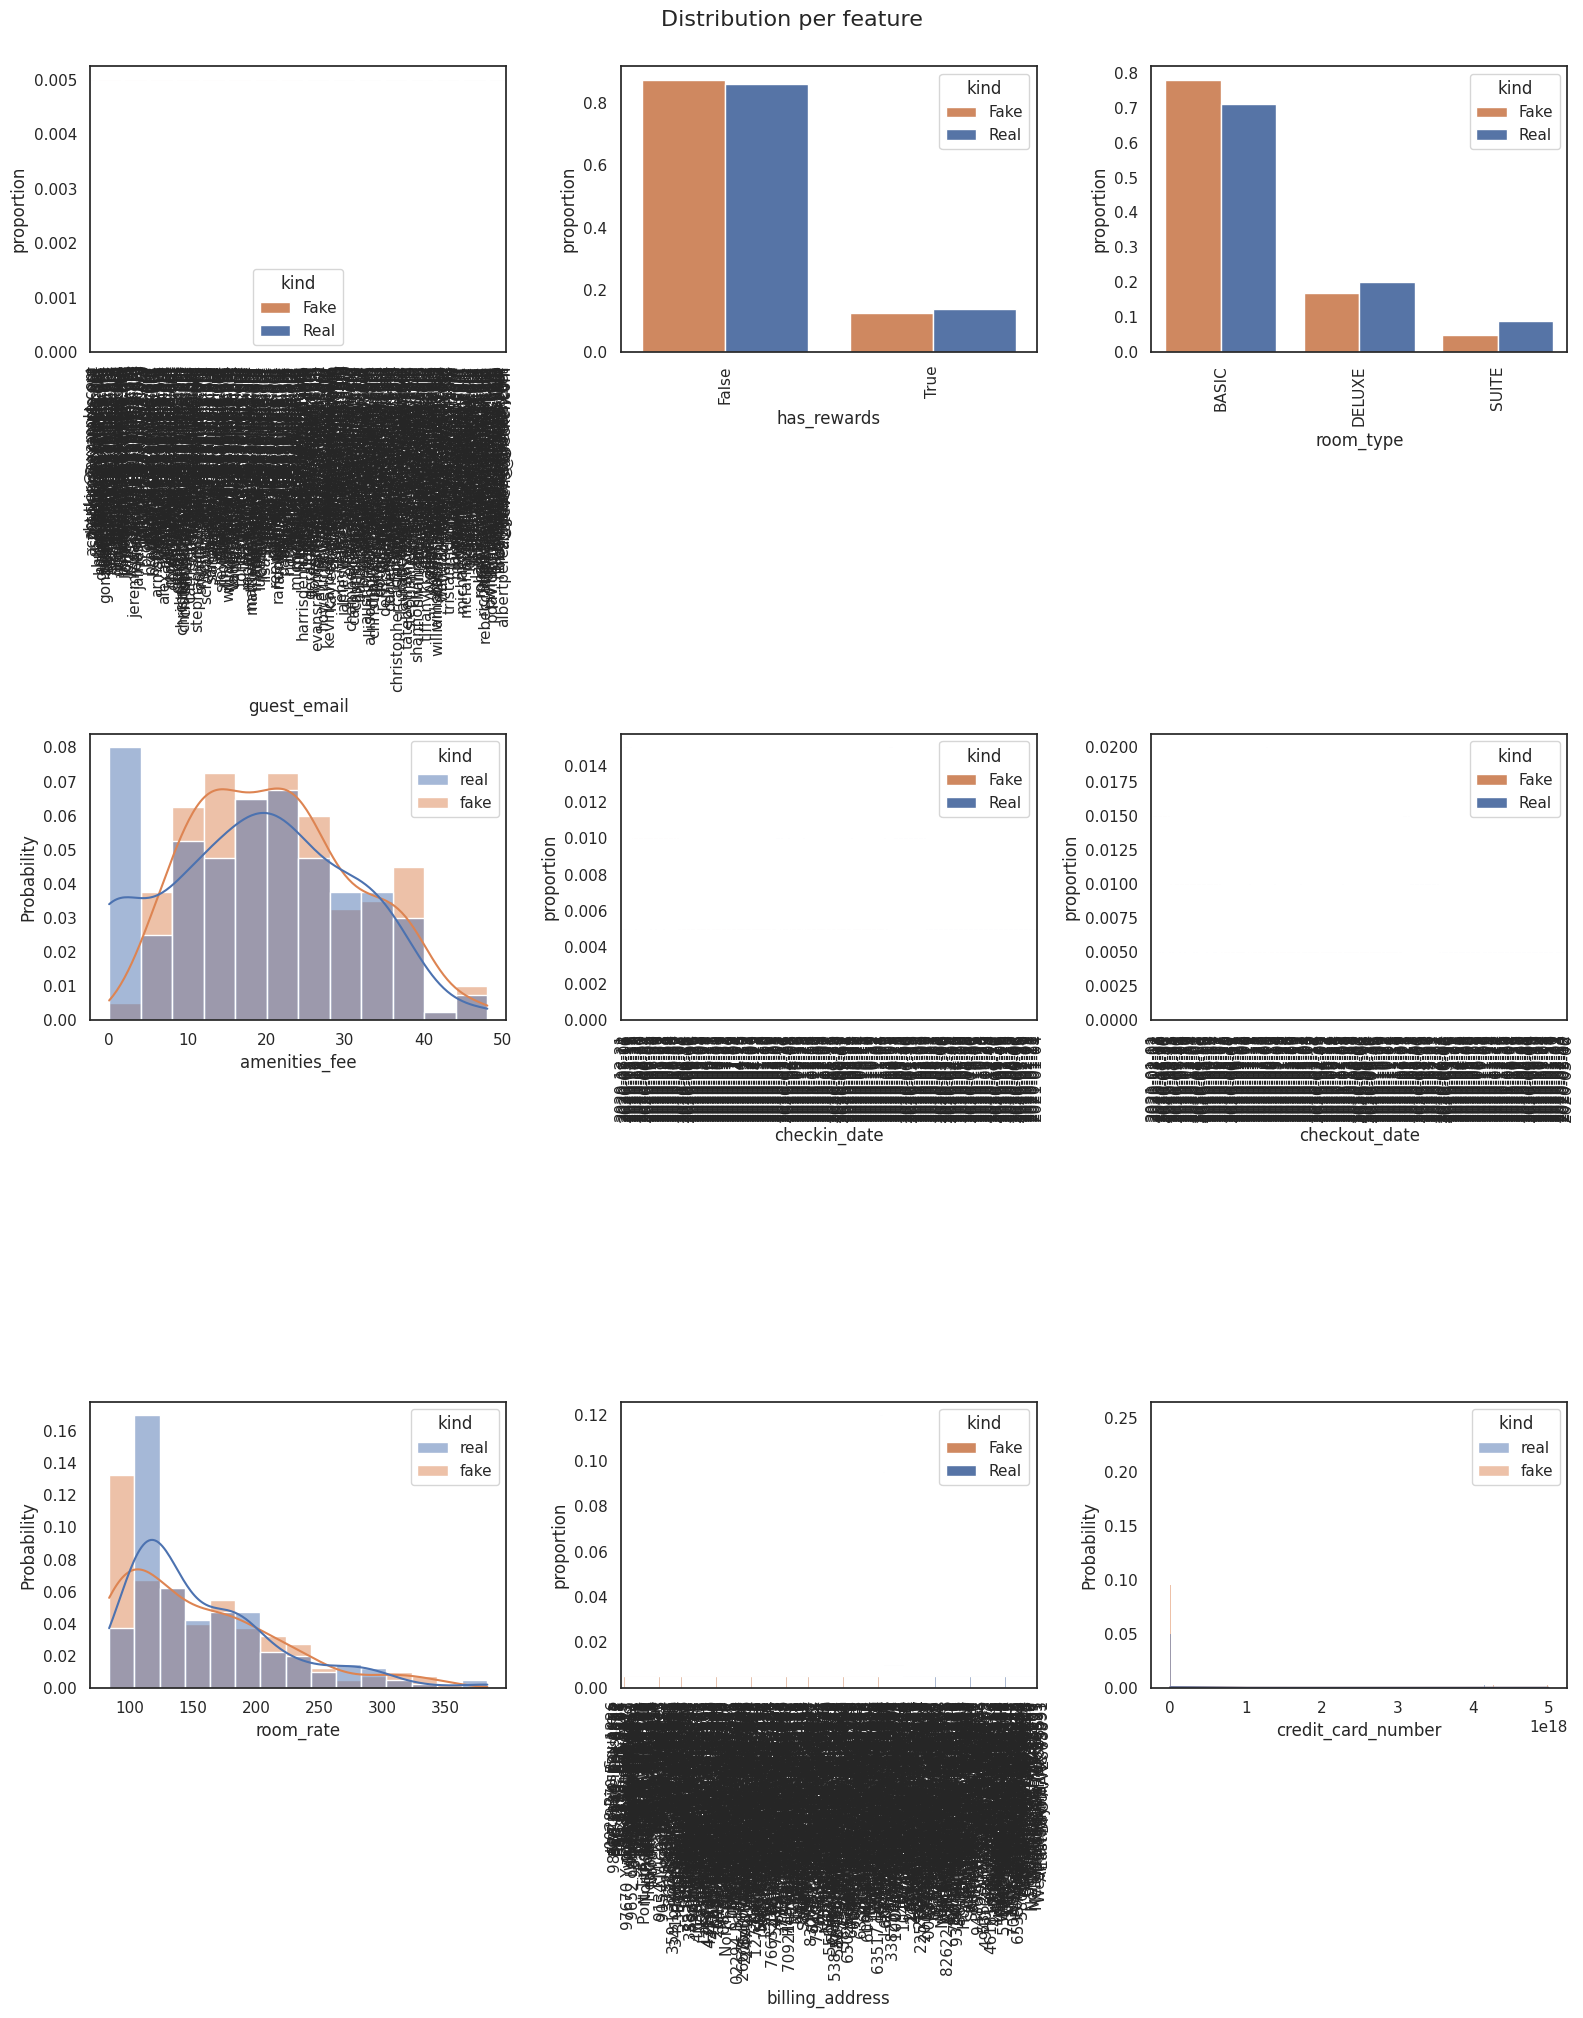

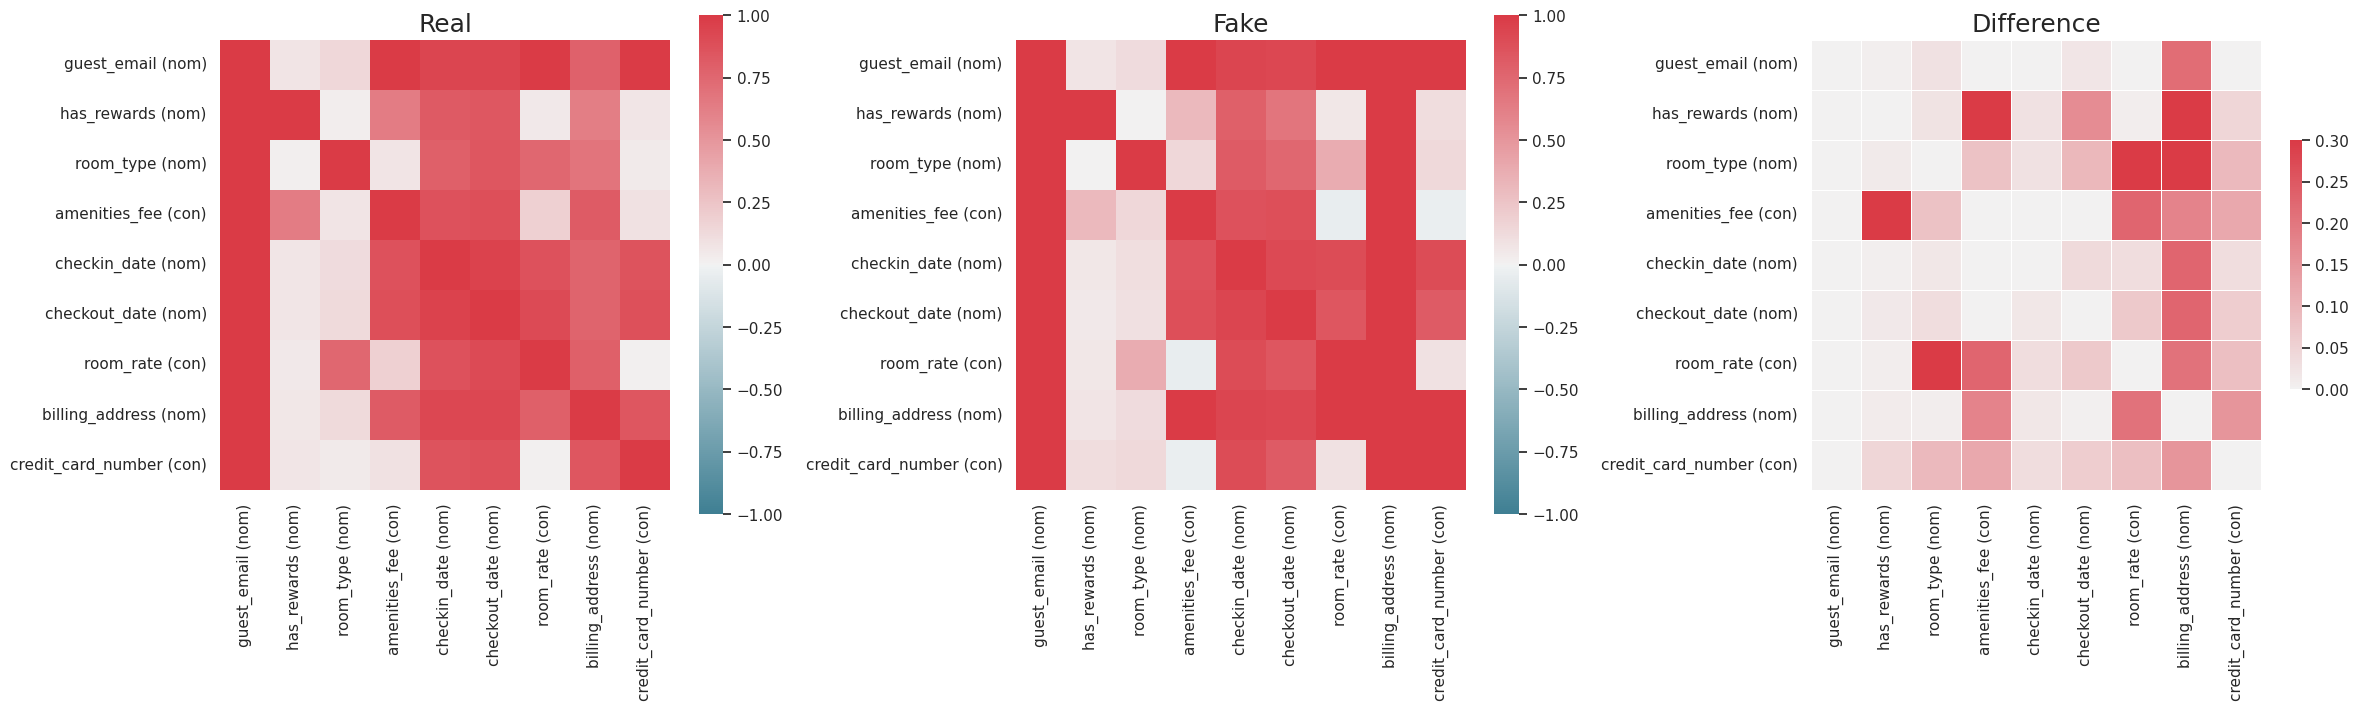

DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [22]:
from table_evaluator import TableEvaluator
table_evaluator =  TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()